# Group mini-project

In [1]:
import pandas as pd

### Import des données

In [2]:
df = pd.read_csv("dpt2020.csv", sep=";", keep_default_na=False)
df = df[df.preusuel != '_PRENOMS_RARES']
df.head(2)

,sexe,preusuel,annais,dpt,nombre
10882,1,A,XXXX,XX,27
10883,1,AADAM,XXXX,XX,30


In [3]:
# On vérifie les données
df.sexe.unique() # OK
df.annais.unique() # années "XXXX" présentes dans le dataset
df.dpt.unique() # départements "XX" présents dans le dataset
df.nombre.isna().sum() # OK, aucun nombre manquant

0

In [4]:
df = df.loc[df.annais != 'XXXX']
df = df.loc[df.dpt    != "XX"  ].astype({"annais":"int", "dpt":"int"})
df.dtypes

sexe         int64
preusuel    object
annais       int64
dpt          int64
nombre       int64
dtype: object

In [5]:
# calcul du total de naissances par sexe, par département et par année
df_frq_dpt_an = df.groupby(['annais', 'dpt', 'sexe']).sum()
df_frq_dpt_an.columns=["total_dpt_an"]
df_frq_dpt_an.head()

total_dpt_an
annais dpt sexe              
1900   1   1             1336
           2             1833
       2   1             2154
           2             2885
       3   1             1684

In [6]:
# Injection dans le df principal et calcul du ratio de chaque nom dans son département et par année
df = df.set_index(['annais', 'dpt', 'sexe']).join(df_frq_dpt_an)
df["freq_dep_an"] = df.nombre / df.total_dpt_an * 100
df.head()

preusuel  nombre  total_dpt_an  freq_dep_an
annais dpt sexe                                              
1900   1   1        ADRIEN       8          1336     0.598802
           1          AIME      10          1336     0.748503
           1        ALBERT      22          1336     1.646707
           1     ALEXANDRE      10          1336     0.748503
           1        ALFRED       8          1336     0.598802

In [7]:
# calcul du total de naissances par sexe et par année pour la France entière
df_frq_an =  df.reset_index()[['annais', 'sexe','nombre']].groupby(['annais', 'sexe']).sum()
df_frq_an.columns=["total_an"]
df_frq_an.head()

total_an
annais sexe          
1900   1       167115
       2       223390
1901   1       185404
       2       243254
1902   1       193775

In [8]:
# calcul du total d'un nom par sexe et par année pour la France entière
df_frq_an2 =  df.reset_index()[['annais', 'sexe','nombre', 'preusuel']].groupby(['annais', 'sexe', 'preusuel']).sum()
df_frq_an2.columns=["total_nom_an"]
df_frq_an2.head()

total_nom_an
annais sexe preusuel              
1900   1    ABEL               382
            ABRAHAM              9
            ACHILLE            152
            ACHILLES             4
            ADAM                 9

In [9]:
# Injection dans le df principal et calcul du ratio
df = df.reset_index().set_index(['annais', 'sexe']).join(df_frq_an)
df = df.reset_index().set_index(['annais', 'sexe', 'preusuel']).join(df_frq_an2)
df["freq_an"] = df.total_nom_an / df.total_an * 100
df.head()

dpt  nombre  total_dpt_an  freq_dep_an  total_an  \
annais sexe preusuel                                                     
1900   1    ABEL        2      16          2154     0.742804    167115   
            ABEL        3       5          1684     0.296912    167115   
            ABEL        7       7          1458     0.480110    167115   
            ABEL        9       6           824     0.728155    167115   
            ABEL       10       4           811     0.493218    167115   

                      total_nom_an   freq_an  
annais sexe preusuel                          
1900   1    ABEL               382  0.228585  
            ABEL               382  0.228585  
            ABEL               382  0.228585  
            ABEL               382  0.228585  
            ABEL               382  0.228585

In [10]:
df=df.reset_index()

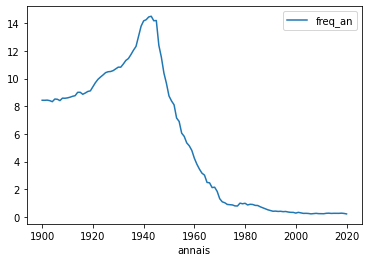

In [11]:
# Evolution des JEAN masculins sur la France entière
df.loc[(df.preusuel=="JEAN") * (df.sexe==1)].plot("annais","freq_an");

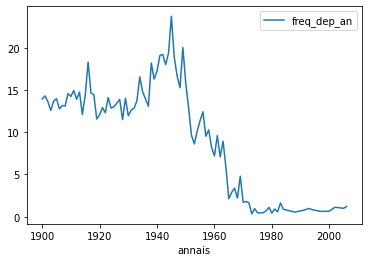

In [12]:
# Evolution des JEAN masculins sur un département (46)
df.loc[(df.preusuel=="JEAN")  * (df.sexe==1) * (df.dpt==46)].plot("annais","freq_dep_an");

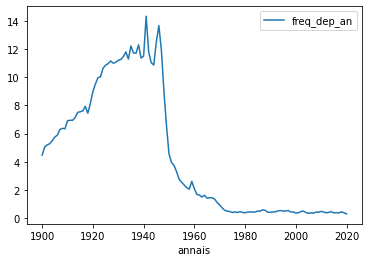

In [13]:
# Evolution des JEAN masculins sur un département (75)
df.loc[(df.preusuel=="JEAN")  * (df.sexe==1) * (df.dpt==75)].plot("annais","freq_dep_an");

In [14]:
df

,annais,sexe,preusuel,dpt,nombre,total_dpt_an,freq_dep_an,total_an,total_nom_an,freq_an
0,1900,1,ABEL,2,16,2154,0.742804,167115,382,0.228585
1,1900,1,ABEL,3,5,1684,0.296912,167115,382,0.228585
2,1900,1,ABEL,7,7,1458,0.480110,167115,382,0.228585
3,1900,1,ABEL,9,6,824,0.728155,167115,382,0.228585
4,1900,1,ABEL,10,4,811,0.493218,167115,382,0.228585
...,...,...,...,...,...,...,...,...,...,...
3668269,2020,2,ÉVA,93,4,6961,0.057463,229014,156,0.068118
3668270,2020,2,ÉVA,94,5,6283,0.079580,229014,156,0.068118
3668271,2020,2,ÉVA,95,6,6010,0.099834,229014,156,0.068118
3668272,2020,2,ÉVA,972,3,423,0.709220,229014,156,0.068118


In [15]:
# Nombre total de naissances chez les filles et les garçons (toute la France, toutes les dates)
tot = df[['sexe', 'nombre']].groupby("sexe").sum()
tot.columns = ["tot"]

# Nb total pour un prénom / nb total de naissances pour ce sexe
freq_tot = df[['sexe', 'preusuel', 'nombre']].groupby(["sexe","preusuel"]).sum().join(tot)
freq_tot["freq_tot"] = freq_tot.nombre/freq_tot.tot *100
freq_tot

nombre       tot  freq_tot
sexe preusuel                            
1    AADIL          6  38966095  0.000015
     AAHIL          3  38966095  0.000008
     AARON      28278  38966095  0.072571
     AARONN         4  38966095  0.000010
     AARUSH        17  38966095  0.000044
...               ...       ...       ...
2    ÉRINE         41  37320686  0.000110
     ÉVA         1387  37320686  0.003716
     ÉVELYNE       61  37320686  0.000163
     ÉVY           10  37320686  0.000027
     ÉYA            3  37320686  0.000008

[16138 rows x 3 columns]

In [16]:
# Injection dans le df principal
df = df.set_index(['sexe','preusuel']).join(freq_tot.freq_tot)
df.head()

annais  dpt  nombre  total_dpt_an  freq_dep_an  total_an  \
sexe preusuel                                                             
1    AADIL       1983   84       3          3037     0.098782    348057   
     AADIL       1992   92       3         10898     0.027528    339692   
     AAHIL       2016   95       3          6850     0.043796    284287   
     AARON       1962   75       3         48085     0.006239    420845   
     AARON       1976   75       3         16802     0.017855    342800   

               total_nom_an   freq_an  freq_tot  
sexe preusuel                                    
1    AADIL                3  0.000862  0.000015  
     AADIL                3  0.000883  0.000015  
     AAHIL                3  0.001055  0.000008  
     AARON                3  0.000713  0.072571  
     AARON                3  0.000875  0.072571

In [17]:
df = df.reset_index()

In [18]:
df.loc[df.sexe==2].iloc[df.loc[df.sexe==2]["freq_tot"].argmax()]  # All time podium F

sexe                    2
preusuel            MARIE
annais               1900
dpt                     1
nombre                639
total_dpt_an         1833
freq_dep_an     34.860884
total_an           223390
total_nom_an        48713
freq_an         21.806258
freq_tot         5.980338
Name: 2985669, dtype: object

In [19]:
df.loc[df.sexe==1].iloc[df.loc[df.sexe==1]["freq_tot"].argmax()] # All time podium M

sexe                    1
preusuel             JEAN
annais               1900
dpt                     1
nombre                144
total_dpt_an         1336
freq_dep_an     10.778443
total_an           167115
total_nom_an        14097
freq_an          8.435508
freq_tot         4.909006
Name: 750906, dtype: object

In [20]:
df.loc[df.sexe==2].iloc[df.loc[df.sexe==2]["freq_tot"].argmin()] # All time "least favorite" F

sexe                   2
preusuel          AALIYA
annais              2017
dpt                   75
nombre                 3
total_dpt_an       15970
freq_dep_an     0.018785
total_an          244244
total_nom_an           3
freq_an         0.001228
freq_tot        0.000008
Name: 1702064, dtype: object

In [21]:
df.loc[df.sexe==1].iloc[df.loc[df.sexe==1]["freq_tot"].argmin()] # All time "least favorite" G

sexe                   1
preusuel           AAHIL
annais              2016
dpt                   95
nombre                 3
total_dpt_an        6850
freq_dep_an     0.043796
total_an          284287
total_nom_an           3
freq_an         0.001055
freq_tot        0.000008
Name: 2, dtype: object

In [22]:
# Ajouter le nb de noms différents par année et sexe (et par département)
df_nb_distinct_france_s = df.groupby(['annais', 'sexe'])["preusuel"].count()
df_nb_distinct_france_s.name = "nb_distinct_fr_s"

df_nb_distinct_dep_s = df.groupby(['annais', 'sexe',"dpt"])["preusuel"].count()
df_nb_distinct_dep_s.name = "nb_distinct_dpt_s"

# Nombre de noms différents par année et par département (tous sexes confondus)
# # df_nb_distinct_france = df.groupby(['annais'])["preusuel"].count()
# df_nb_distinct_france.name = "nb_distinct_fr"
df_nb_distinct_dep = df.groupby(['annais',"dpt"])["preusuel"].count()
df_nb_distinct_dep.name = "nb_distinct_dpt"


df = df.set_index(['annais','sexe']).join(df_nb_distinct_france_s)
df = df.reset_index().set_index(['annais','sexe', 'dpt']).join(df_nb_distinct_dep_s)
df = df.reset_index().set_index(['annais', 'dpt']).join(df_nb_distinct_dep)
df = df.reset_index()

### Progression

In [23]:
table = df[["annais","preusuel","freq_an","sexe"]].drop_duplicates().pivot(
            index='annais', columns=["sexe","preusuel"], values='freq_an').fillna(0)
table = table-table.shift()
table = pd.melt(table.reset_index(), id_vars=["annais"]).set_index(["annais", 'sexe', 'preusuel'])
table.columns = ["progression"]
table.head()

,,,progression
annais,sexe,preusuel,
1900,1,ADRIEN,NaN
1901,1,ADRIEN,-0.004521
1902,1,ADRIEN,-0.000747
1903,1,ADRIEN,-0.001246
1904,1,ADRIEN,0.000111


In [24]:
df = df.set_index(["annais", 'sexe', 'preusuel']).join(table).reset_index()

In [26]:
# Ajouter un département 
dff = df[['annais', 'sexe', 'preusuel', 'freq_an', 'nb_distinct_fr_s']].drop_duplicates()
dff["dpt"]=0
dff.columns = ['annais', 'sexe', 'preusuel', 'freq_dep_an','nb_distinct_dpt_s', 'dpt']
df = df.append(dff)

/tmp/ipykernel_14728/164376780.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)


In [27]:
df.to_csv("data_complet.csv", index=False)